# Basic Convex Optimization
An optimization problem may have an objective function and one or more constraints represented as equalities or inequalities. In the example in this notebook, taken from the [CVXPY](https://www.cvxpy.org/index.html) website, the problem can be expressed as

$$minimize: \space z = (x - y)^2$$
$$subject \space to: \space x + y = 1, \space x - y \ge 1$$

In [7]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(-5.0, 5.0, 250)
y = np.linspace(-5.0, 5.0, 250)
X, Y = np.meshgrid(x, y)

In [19]:
def f(x, y):
    return (x - y) ** 2

def p1(x, y):
    return x + y - 1

def p2(x, y):
    return x - y + 1

In [61]:
z = f(X, Y)
z1 = p1(X, Y)
z2 = p2(X, Y)

We can plot the objective function and the constraints since they can be represented in a 3D space to have a visual representation

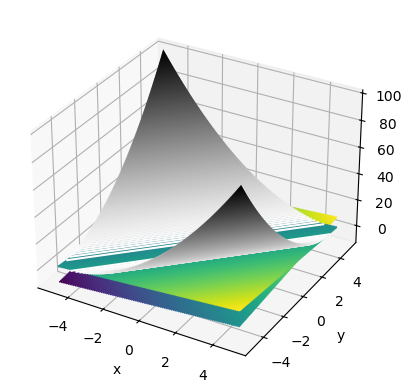

In [62]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z1, 200)
ax.contour3D(X, Y, z2, 200)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour3D(X, Y, z, 200, cmap='binary')

### Plotly
Plotly is a graphic library that allows to rotate the plot 

In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [66]:
# Initialize figure with 4 3D subplots
fig = make_subplots()

# Generate data
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
xGrid, yGrid = np.meshgrid(x, y)
z = (xGrid - yGrid) ** 2

z1 = xGrid + yGrid -1 
z2 = xGrid - yGrid -1

# adding surfaces to subplots.
fig.add_trace(go.Surface(x=x, y=y, z=z, colorscale='Viridis', showscale=False))
fig.add_trace(go.Surface(x=x, y=y, z=z1, colorscale='gray', showscale=False))
fig.add_trace(go.Surface(x=x, y=y, z=z2, colorscale='gray', showscale=False))
fig.update_layout(title_text='Objective function and constraints', height=500, width=500)
fig.show()

## CVXPY
We need to instantiate the variables, the objective function and the constraints.

In [69]:
# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

In [70]:
# Form objective.
obj = cp.Minimize((x - y)**2)

In [71]:
# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

We pass the objective function and the constraints to the solver that will return the (optimal) minimum value for the objective function and the values of the x, y variables.

In [72]:
# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print('Status: ', prob.status)
print('Optimal (minimum) value:', prob.value)
print('Optimal variables x={:.2f}, y={:.2f}'.format(x.value, y.value))

status:  optimal
Optimal (minimum) value: 1.0
Optimal variables x=1.00, y=0.00
